In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
url = '/content/Unemployment in India.csv'  # Update this with your dataset URL or local path

# Check if the column name 'Date' is correct
try:
    df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
except ValueError:
    # If ValueError occurs, it means the column name is likely incorrect
    # Read the data without parsing dates first
    df = pd.read_csv(url)

    # Check the actual column names in the DataFrame
    print(df.columns)

    # Update the 'parse_dates' and 'index_col' parameters with the correct column name
    # For example, if the date column is named 'Reported Date':
    # df = pd.read_csv(url, parse_dates=['Reported Date'], index_col='Reported Date')

    # Handle the error or make necessary changes based on the column names found
    # ... (Your logic to handle the error and continue) ...

Index(['Region', ' Date', ' Frequency', 'Unemployment Rate',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [3]:
print(df.head())        # Display the first few rows of the dataset


           Region         Date  Frequency  Unemployment Rate  \
0  Andhra Pradesh   31-05-2019    Monthly               3.65   
1  Andhra Pradesh   30-06-2019    Monthly               3.05   
2  Andhra Pradesh   31-07-2019    Monthly               3.75   
3  Andhra Pradesh   31-08-2019    Monthly               3.32   
4  Andhra Pradesh   30-09-2019    Monthly               5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [4]:
print(df.info())        # Display information about the dataset, including null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3   Unemployment Rate                         740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


In [5]:
print(df.describe())

       Unemployment Rate   Estimated Employed  \
count         740.000000         7.400000e+02   
mean           11.787946         7.204460e+06   
std            10.721298         8.087988e+06   
min             0.000000         4.942000e+04   
25%             4.657500         1.190404e+06   
50%             8.350000         4.744178e+06   
75%            15.887500         1.127549e+07   
max            76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000  


In [6]:
df.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Unemployment Rate,14
Estimated Employed,14
Estimated Labour Participation Rate (%),14
Area,14


In [7]:
df = df.interpolate(method='linear')

<ipython-input-7-bdc865afced7>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


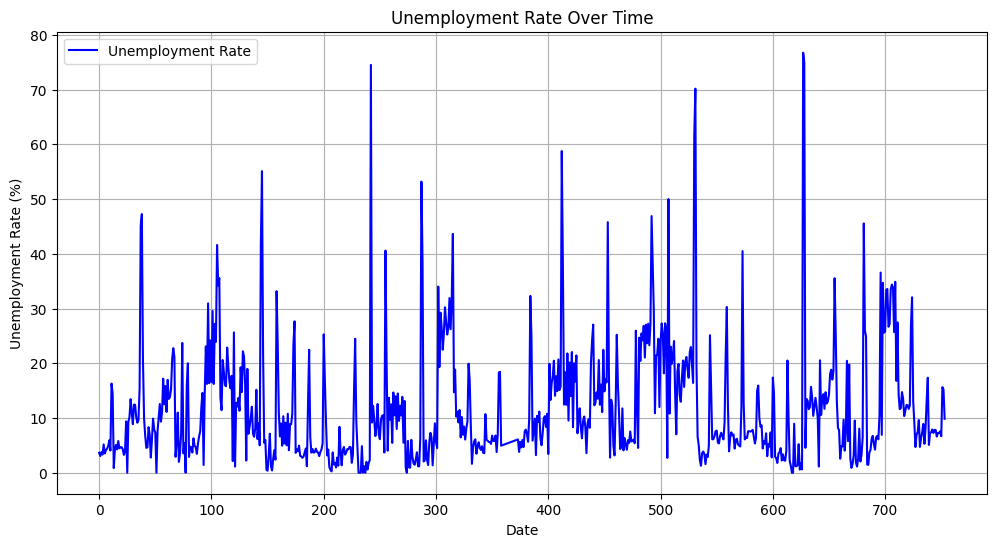

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unemployment Rate'], color='blue', label='Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()


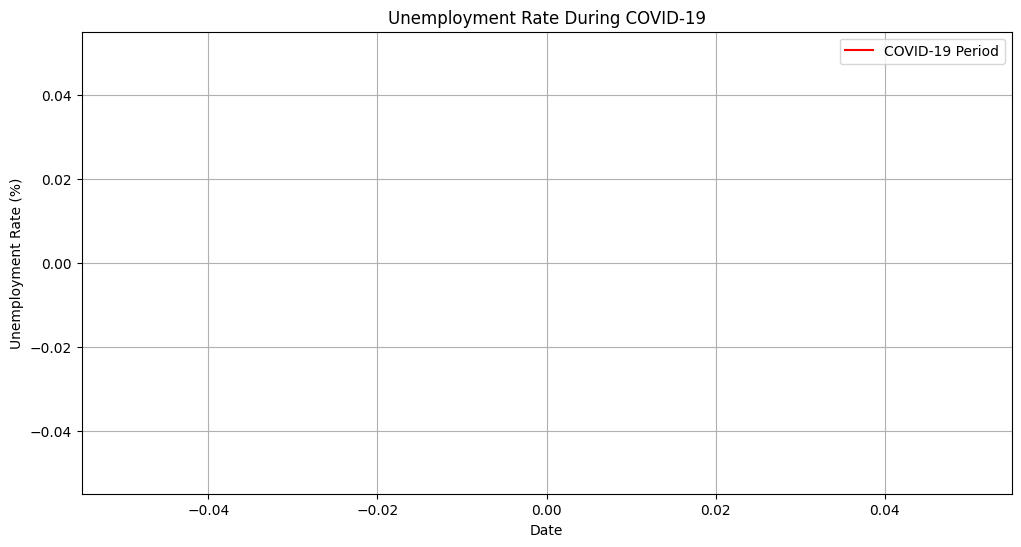

In [10]:
covid_period = df.loc['2020-03':'2022-12']
plt.figure(figsize=(12, 6))
plt.plot(covid_period.index, covid_period['Unemployment Rate'], color='red', label='COVID-19 Period')
plt.title('Unemployment Rate During COVID-19')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

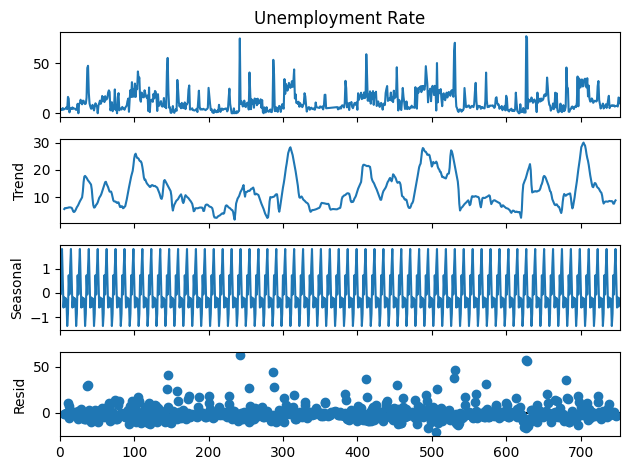

In [11]:
# Step 7: Decompose the unemployment time series to examine trend, seasonality, and noise
# Ensure the dataset is monthly for proper decomposition
decomposition = seasonal_decompose(df['Unemployment Rate'], model='additive', period=12)
decomposition.plot()
plt.show()
